# Count prints and booklets with songs per year 

The development of the number of particular retained heritage of printing in the nineteenth century might say something about the change of relevance for printers to create these prints. In this notebook the development of printing heritage is investigated. The Python3 pandas and numpy libraries are used.

In [7]:
import pandas as pd
import numpy as np

## Prints for Koppermaandag
From the 18th century onwards, so called "Koppermaandagprenten" are retained in cultural heritage institutes. These prints are a proof of the quality of printing a company was able to deliver. The labourers of a printingshop made a print and brought them to the customers, expecting them to buy the print, or give a tip. This extra income was used to buy drinks on "Koppermaandag", a celebration on the first mondag after Epiphany.

In 199?, an important publication is made about this type of printwork, with an overview of the retained Koppermaandagprenten. From this book the counts per year are available.

In [12]:
prentenDF = pd.read_csv("../../data/koppermaandagprentenCount.csv", index_col="year")

# Hoeveel prenten zijn er in totaal overgeleverd?

<AxesSubplot: xlabel='year'>

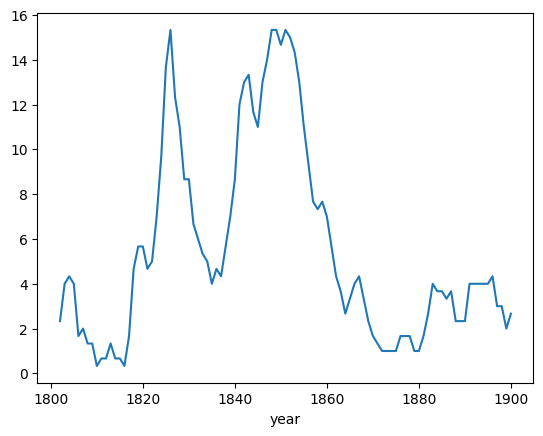

In [13]:
prentenSeries = prentenDF['count']
prentenSeries_rm = prentenSeries.rolling(3).mean()
prentenSeries_rm.plot()

It turns out making these type of prints was popular during the 1820's and between 1840 and 1860. (Can I calculate the coincidence of retainment here?)

## Songs
Between 1848 and ca. 1914 typographical associations created booklets with lyrics of songs they sang during feasts they organized. The dataset contains a table with an overview of all the songs in the booklets between 1848 and 1870, with among others title, year and writer. With this data the number of songs per year, available in cultural heritage institutions can be calculated.

In [15]:
liedjesDF = pd.read_csv("../../data/liedjes/liedjes.csv", dtype={'jaartal': 'Int32'})

print("Number of songs:    " + str(len(liedjesDF)))
print("Number of booklets:  " + str(len(liedjesDF['sourceID'].unique())))

Number of songs:    728
Number of booklets:  59


The dataset contains 728 songs in 59 booklets.

We want to investigate how much songs are in the dataset per year. We smooth the outcome with a three years rolling mean.

<AxesSubplot: xlabel='jaartal'>

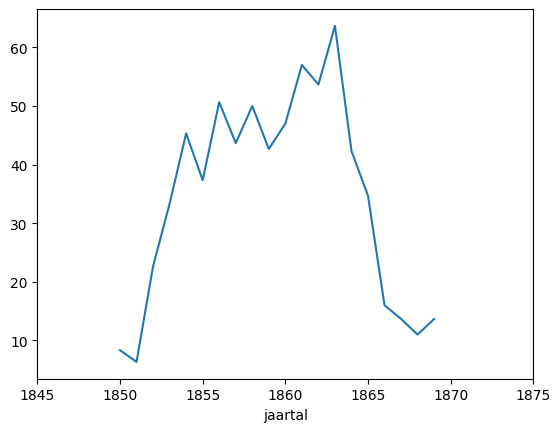

In [2]:
count = liedjesDF.groupby('jaartal').size()
count_rm = count.rolling(3).mean()
count_rm.plot(xlim=(1845,1875))

In [3]:
boekjesDF = pd.read_csv('../../data/liedjes/boekjes.csv')
boekjesSELECT = boekjesDF.loc[boekjesDF['size'] < 50].loc[boekjesDF['size'] > 2]

<AxesSubplot: xlabel='year'>

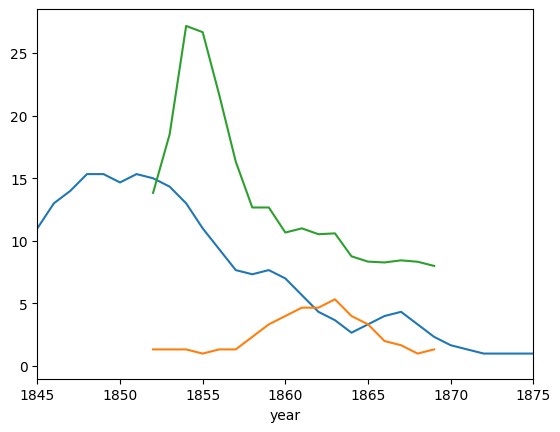

In [4]:
prentenSeries = prentenDF['count']
prentenSeries_rm = prentenSeries.rolling(3).mean()
prentenSeries_rm.plot(xlim = (1845,1875))

boekjesCNT = boekjesSELECT.groupby('year').size()
boekjesCNT_rm = boekjesCNT.rolling(3).mean()
boekjesCNT_rm.plot()

boekjesSUM = boekjesSELECT.groupby('year').sum('size')
boekjesXL = boekjesSUM.merge(boekjesCNT.rename('count'), left_index=True, right_index=True) 

boekjesAVG = boekjesXL['size'] / boekjesXL['count']
boekjesAVG_rm = boekjesAVG.rolling(3).mean()
boekjesAVG_rm.plot()
